<a href="https://colab.research.google.com/github/itssofiarce/regresion-fcdd/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataSet Elegido: Base de datos de graduados universitarios

Fuente: https://www.datos.gob.ar/dataset/produccion-graduados-universitarios-sistema-araucano-2016-2018/archivo/produccion_afbfc04e-6130-448c-953f-ef601f3e8bda

El dataset se encuentra publicado en la página del gobierno nacional, es de libre acceso. Las entidades responsables son Ministerio de Desarrollo Productivo. Unidad Gabinete de Asesores. Dirección Nacional de Estudios para la Producción (CEP XXI).

Los datos contienen información acerca de los graduados universitarios recolectados desde el 2019 al 2021. Todas las variables ya estan codificadas numericamente.






| Título de la columna      | Tipo de dato | Descripción |
| ------------------------- | ------------ | ----------- |
| id                    | Número entero (integer)    | Identificador individual.        |
| rama_id                    | Número entero (integer)    | Identificador de la rama de estudio       |
| disciplina_id                    | Número entero (integer)    | Identificador de disciplina de estudio.       |
| tipo_titulo_id                    | Número entero (integer)    | Identificador de jerarquía de título.       |
| gestion_id                    | Número entero (integer)    | Identificador del tipo de gestión del establecimiento educativo donde se cursaron los estudios.        |
| genero_id                    | Número entero (integer)    | Identificador de género.       |
| region_id                    | Número entero (integer)    | Identificador de la región geográfica donde se cursaron los estudios.       |
| tamaño_id                    | Número entero (integer)    | Identificador del tamaño de la firma donde trabajó el/la gradudado/a, según corresponda.       |
| letra_id                    | Número entero (integer)    | Identificador del sector productivo donde la firma se desempeña.        |
| salario                    | Número decimal (decimal)    | Remuneración total por todo concepto, en pesos corrientes.       |
| anio                    | Número entero (integer)    | Año de observación.       |
| anioegreso                    | Número entero (integer)    | Año de finalización de los estudios.       |
| anioac                    | Número entero (integer)    | Año de nacimiento de la persona graduada.       |

In [457]:
import pandas as pd
import matplotlib.pyplot as plt

In [458]:
df = pd.read_csv('/content/drive/MyDrive/Datos FCDD/base_araucano.csv')
# comparativa completa -> desc general, fal max min, donde cuando, graficos abarcativos
# infor georef
# correlacion

# Analisis Exploratorio

In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820335 entries, 0 to 820334
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              820335 non-null  int64  
 1   rama_id         820335 non-null  int64  
 2   disciplina_id   820335 non-null  int64  
 3   tipo_titulo_id  820335 non-null  int64  
 4   gestion_id      820335 non-null  int64  
 5   genero_id       820335 non-null  int64  
 6   region_id       820335 non-null  int64  
 7   tamaño_id       478719 non-null  float64
 8   letra_id        478603 non-null  float64
 9   salario         478719 non-null  float64
 10  anio            820335 non-null  int64  
 11  anioegreso      820335 non-null  int64  
 12  anionac         819147 non-null  float64
dtypes: float64(4), int64(9)
memory usage: 81.4 MB


Las columnas tamaño_id, letra_id, salario y añoac contienen valores nulos.

In [460]:
df.head()

,id,rama_id,disciplina_id,tipo_titulo_id,gestion_id,genero_id,region_id,tamaño_id,letra_id,salario,anio,anioegreso,anionac
0,1,1,1,4,1,1,1,NaN,NaN,NaN,2019,2017,1976.0
1,1,1,1,4,1,1,1,NaN,NaN,NaN,2020,2017,1976.0
2,1,1,1,4,1,1,1,NaN,NaN,NaN,2021,2017,1976.0
3,2,1,1,4,1,1,2,NaN,NaN,NaN,2019,2018,1980.0
4,2,1,1,4,1,1,2,NaN,NaN,NaN,2020,2018,1980.0


Como anioac contiene menos del 5% de la totalidad de datos nulos dropeamos los registros con valores nulos para esta columna.

In [461]:
df = df.dropna(subset=['anionac'])

In [462]:
df.isnull().sum()

id                     0
rama_id                0
disciplina_id          0
tipo_titulo_id         0
gestion_id             0
genero_id              0
region_id              0
tamaño_id         340959
letra_id          341075
salario           340959
anio                   0
anioegreso             0
anionac                0
dtype: int64

### Imputación de nulos

Para los valores faltantes de salario imputamos la mediana dependiendo de la disciplina

In [463]:
salario = df.groupby('disciplina_id')['salario'].median().reset_index().to_dict()
df['salario'] = df['salario'].fillna(salario['salario'])

In [464]:
#salario['salario']

# Mapeo de valores códigos a valores categoricos

Mapeamos los códigos del dataset origianal con los valores correspondientes, para que a la hora de graficarlos sea mas significativo y facilite su lectura.

In [465]:
def mapear_codigos_valores(dataset, etiquetas, nombre_hojas):

    df_etiquetado=dataset.copy()
    for hoja in nombre_hojas:
      # Leemos hoja por hoja del excel de las etiquetas
      labels_df = pd.read_excel(etiquetas, sheet_name=f'cod_{hoja}')

      # Excepción para el nombre de la hoja título
      if hoja == 'titulo':
        hoja = 'tipo_titulo'

      # Armamos un diccionario con los valores los códigos y sus equivalencias
      mapeo = {v: k for k, v in labels_df.set_index(f'{hoja}')[f'{hoja}_id'].to_dict().items()}
      df_etiquetado[f'{hoja}_id'] = df_etiquetado[f'{hoja}_id'].map(mapeo)

    # convertimos la columna anio en int
    df_etiquetado['anionac'] = df_etiquetado['anionac'].astype(int)

    # calculamos la edad de graduación
    df_etiquetado['edad_graduacion'] = df_etiquetado['anioegreso'] - df_etiquetado['anionac']
    return df_etiquetado


In [466]:
df_etiquetado=mapear_codigos_valores(df, '/content/drive/MyDrive/Datos FCDD/diccionario.xlsx', ['rama', 'disciplina', 'titulo', 'gestion', 'genero', 'region', 'tamaño', 'letra', 'letra'])

In [467]:
# Chequeamos que se hayan hecho bien los cambios
df_etiquetado.head()

,id,rama_id,disciplina_id,tipo_titulo_id,gestion_id,genero_id,region_id,tamaño_id,letra_id,salario,anio,anioegreso,anionac,edad_graduacion
0,1,Ciencias Sociales,Economía y Administración,Posgrado,estatal,mujer,CABA,NaN,NaN,86378.4295,2019,2017,1976,41
1,1,Ciencias Sociales,Economía y Administración,Posgrado,estatal,mujer,CABA,NaN,NaN,94696.8635,2020,2017,1976,41
2,1,Ciencias Sociales,Economía y Administración,Posgrado,estatal,mujer,CABA,NaN,NaN,64019.0780,2021,2017,1976,41
3,2,Ciencias Sociales,Economía y Administración,Posgrado,estatal,mujer,BUENOS AIRES,NaN,NaN,71215.1020,2019,2018,1980,38
4,2,Ciencias Sociales,Economía y Administración,Posgrado,estatal,mujer,BUENOS AIRES,NaN,NaN,75060.9490,2020,2018,1980,38


# Analisis de datos georeferenciales

Agregamos la longitud y latitud de las regiones para poder plotearlo georeferencialmente:
- CABA
- BUENOS AIRES
- RESTO PAMPEANA (SANTA FE, CORDOBA, ENTRE RIOS, LA PAMPA)
- NOA
- NEA
- CUYO
- PATAGONIA

In [468]:
# https://github.com/mgaitan/departamentos_argentina/blob/master/geo-argentina.ipynb
import geopandas as gpd
from shapely.ops import unary_union

<Axes: >

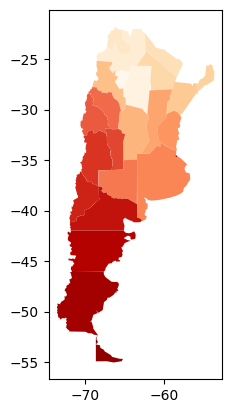

In [469]:
# leer el geojson con geopandas
geo_df = gpd.read_file('/content/drive/MyDrive/ProvinciasArgentina.geojson')
geo_df.plot(cmap='OrRd')

In [470]:
geo_df

,nombre,geometry
0,Tucumán,"POLYGON ((-66.20361 -26.62782, -66.04980 -26.6..."
1,Santiago del Estero,"POLYGON ((-64.42108 -26.28356, -65.03906 -27.8..."
2,Salta,"POLYGON ((-66.11572 -26.21459, -65.85205 -26.3..."
3,Jujuy,"POLYGON ((-67.22534 -23.69483, -66.47827 -24.2..."
4,Formosa,"POLYGON ((-62.35840 -24.08659, -58.40332 -26.8..."
5,Chaco,"POLYGON ((-61.74316 -27.13737, -61.65527 -28.0..."
6,Misiones,"POLYGON ((-56.04126 -27.37177, -55.59082 -28.1..."
7,Corrientes,"POLYGON ((-56.03027 -27.37177, -56.31592 -27.4..."
8,Catamarca,"POLYGON ((-68.51074 -25.16517, -68.54370 -25.6..."
9,Córdoba,"POLYGON ((-65.56641 -30.18312, -65.78613 -31.9..."


In [471]:
# Traer el valor del poligono de buenos aires y capital federal
buenos_aires = geo_df[geo_df['nombre'] == 'Buenos Aires']
cap_fed = geo_df[geo_df['nombre'] == 'Capital Federal']


In [472]:
# Armamos los poligonos para el resto de las areas
resto_pampeana = geo_df[geo_df['nombre'].isin(['Santa Fe', 'Córdoba', 'Entre Ríos', 'La Pampa'])]
patagonia = geo_df[geo_df['nombre'].isin(['Tierra del Fuego', 'Santa Cruz', 'Chubut', 'Río Negro', 'Neuquén'])]
cuyo = geo_df[geo_df['nombre'].isin(['Mendoza', 'San Juan', 'Catamarca', 'La Rioja', 'San Luis'])]
noa = geo_df[geo_df['nombre'].isin(['Salta', 'Jujuy', 'Tucumán', 'Santiago del Estero'])]
nea = geo_df[geo_df['nombre'].isin(['Chaco','Corrientes', 'Formosa', 'Misiones'])]


In [473]:
# Unimos todos los poligonos de las distintas provincias
bs_as_pol=str(buenos_aires['geometry'].values[0])
cap_fed_pol=str(cap_fed['geometry'].values[0])

noa_pol=str(unary_union(noa['geometry']))
nea_pol=str(unary_union(nea['geometry']))
cuyo_pol=str(unary_union(cuyo['geometry']))
patagonia_pol=str(unary_union(patagonia['geometry']))
resto_pampeana_pol=str(unary_union(resto_pampeana['geometry'].buffer(0)))

In [474]:
# Chequeamos los valores de las regiones para facilitar el mapeo de las coordenadas
df_etiquetado['region_id'].unique()

array(['CABA', 'BUENOS AIRES',
       'RESTO PAMPEANA (SANTA FE, CORDOBA, ENTRE RIOS, LA PAMPA)',
       'PATAGONIA', 'NOA', 'NEA', 'CUYO'], dtype=object)

In [475]:
# Creamos un diccionario con los valores de las regiones y sus poligonos para agregarlos a una nueva columna en el dataframe
regiones_poligonos = {
    'BUENOS AIRES': bs_as_pol,
    'CABA': cap_fed_pol,
    'RESTO PAMPEANA (SANTA FE, CORDOBA, ENTRE RIOS, LA PAMPA)': resto_pampeana_pol,
    'NOA': noa_pol,
    'NEA': nea_pol,
    'CUYO': cuyo_pol,
    'PATAGONIA': patagonia_pol
}

In [476]:
# Mapeamos los valores de las regiones con sus poligonos en una nueva columna
df_etiquetado['geometry'] = df_etiquetado['region_id'].map(regiones_poligonos)

In [477]:
df_etiquetado.head()

,id,rama_id,disciplina_id,tipo_titulo_id,gestion_id,genero_id,region_id,tamaño_id,letra_id,salario,anio,anioegreso,anionac,edad_graduacion,geometry
0,1,Ciencias Sociales,Economía y Administración,Posgrado,estatal,mujer,CABA,NaN,NaN,86378.4295,2019,2017,1976,41,POLYGON ((-58.41293334960937 -34.5656657156950...
1,1,Ciencias Sociales,Economía y Administración,Posgrado,estatal,mujer,CABA,NaN,NaN,94696.8635,2020,2017,1976,41,POLYGON ((-58.41293334960937 -34.5656657156950...
2,1,Ciencias Sociales,Economía y Administración,Posgrado,estatal,mujer,CABA,NaN,NaN,64019.0780,2021,2017,1976,41,POLYGON ((-58.41293334960937 -34.5656657156950...
3,2,Ciencias Sociales,Economía y Administración,Posgrado,estatal,mujer,BUENOS AIRES,NaN,NaN,71215.1020,2019,2018,1980,38,"POLYGON ((-60.5126953125 -33.687781758439364, ..."
4,2,Ciencias Sociales,Economía y Administración,Posgrado,estatal,mujer,BUENOS AIRES,NaN,NaN,75060.9490,2020,2018,1980,38,"POLYGON ((-60.5126953125 -33.687781758439364, ..."


# Analisis de las variables

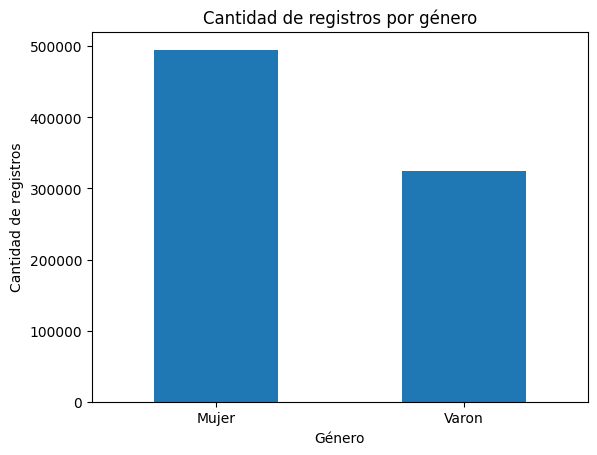

In [478]:
df_etiquetado['genero_id'].value_counts().plot(kind='bar', rot=0)
plt.ylabel('Cantidad de registros')
plt.xlabel('Género')
plt.title('Cantidad de registros por género')
plt.xticks([0, 1], ['Mujer', 'Varon'])
plt.show()


In [479]:
# Porcentage que representa cada entrada por genero
df_etiquetado['genero_id'].value_counts(normalize=True).to_frame()

,proportion
genero_id,
mujer,0.604371
varon,0.395629


Podemos observar que hay mas registros para el genero femenino que para el masculino. El las entradas para el genero femenino representan alrededor del 60% del total de las muestras

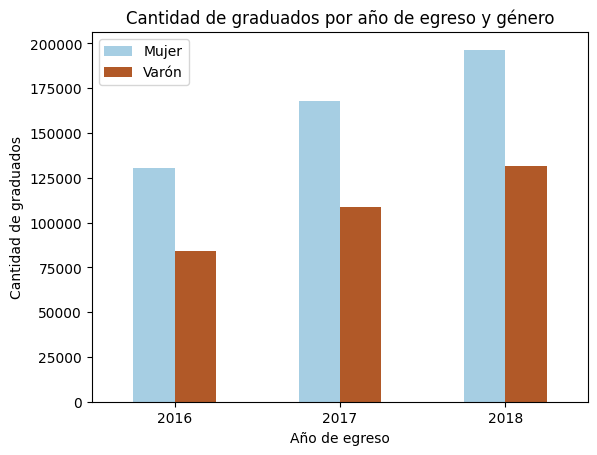

In [480]:
plot = pd.crosstab(index=df_etiquetado['anioegreso'],
                    columns=df_etiquetado['genero_id']).plot(kind='bar', colormap='Paired', rot=0)
plot.set_xlabel('Año de egreso')
plot.set_ylabel('Cantidad de graduados')
plt.legend(['Mujer', 'Varón'])
plot.set_title('Cantidad de graduados por año de egreso y género')
plt.show()

La cantidad de graduados aumentó en el 2018 un % para el género feminino y un % para el género masculino en relacion al 2016

Ahora estudiaremos la distribución del género segun el grado del título

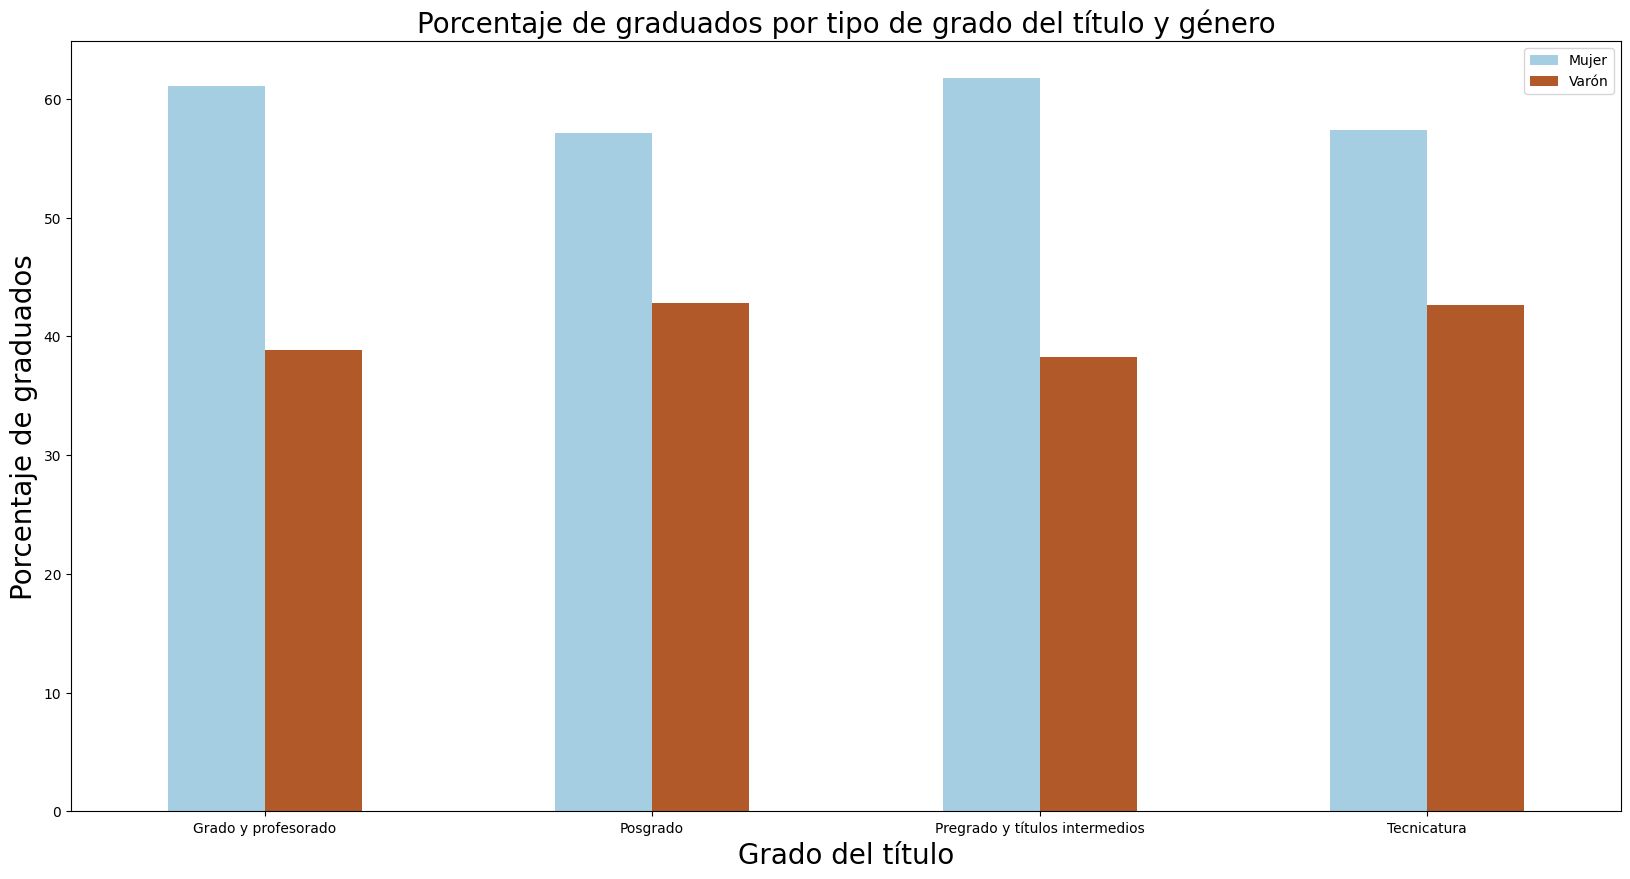

In [481]:
# Calculo de porcentajes de graduados por disciplinas agrupandolos por genero
titulo_genero = df_etiquetado.groupby(['tipo_titulo_id', 'genero_id'])['id'].count()*100/df_etiquetado.groupby('tipo_titulo_id')['id'].count()
titulo_genero.unstack().plot(kind='bar', stacked=False, figsize=(20, 10), fontsize=10, rot=0, colormap='Paired')
plt.xlabel('Grado del título',fontsize=20)
plt.legend(['Mujer', 'Varón'])
plt.ylabel('Porcentaje de graduados', fontsize=20)
plt.title('Porcentaje de graduados por tipo de grado del título y género',fontsize=20)
plt.show()

Según el gráfico de arriba, predomina el sexo femenino para todos los gradudados universitarios en todos los niveles.

¿En qué áreas de estudio estan distribuidas los graduados segun el género?

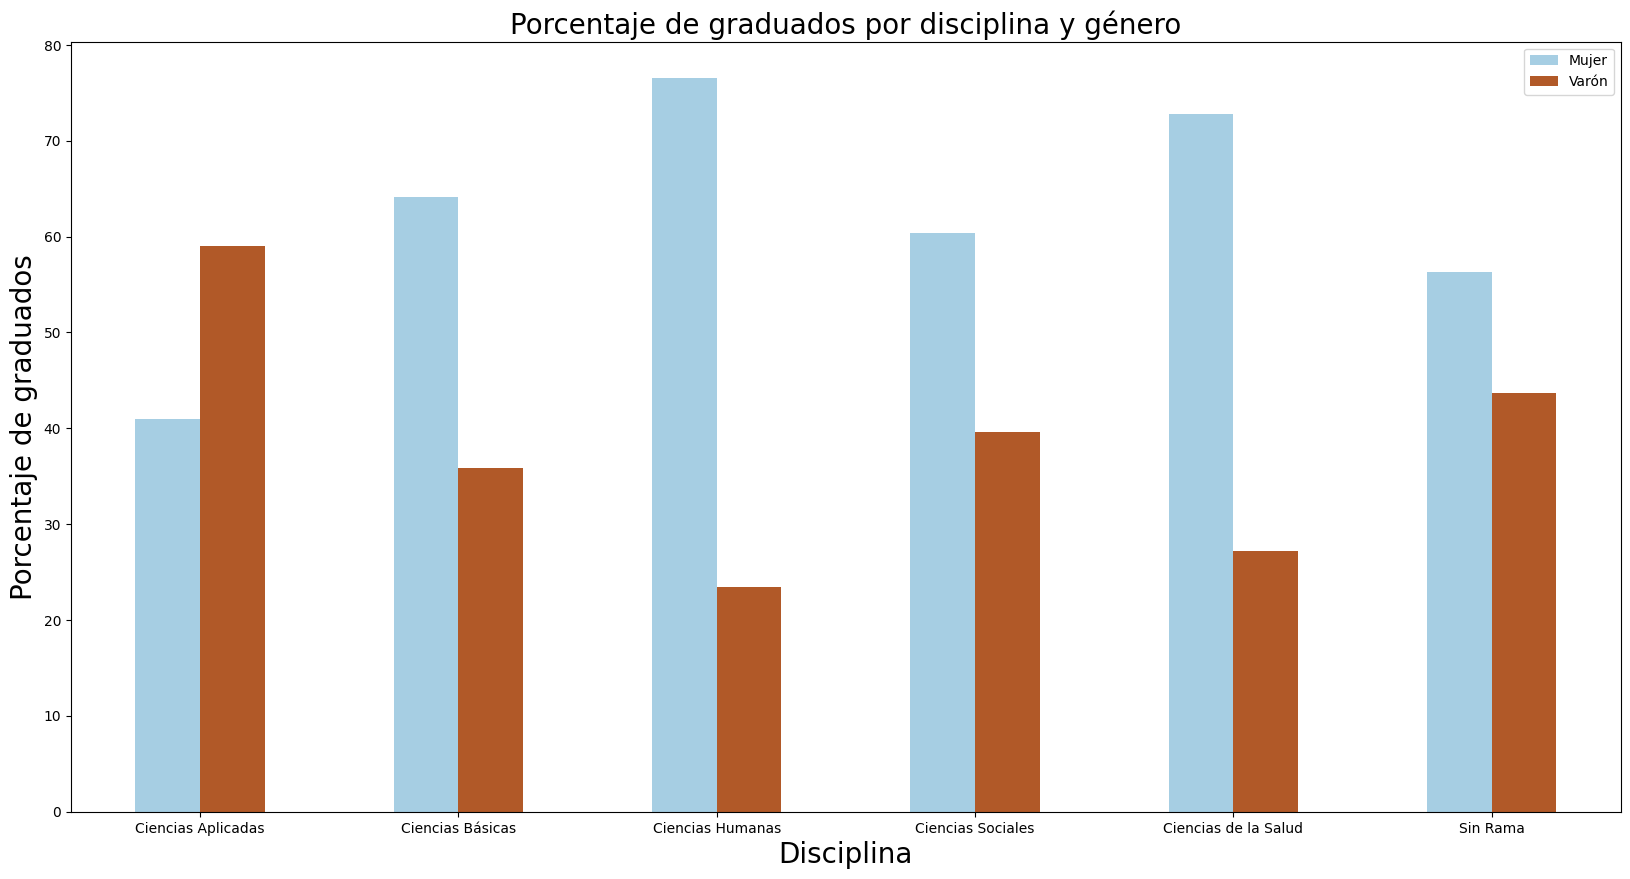

In [482]:
# Gráfico de barras de sexo segun tipo del título
rama_genero = df_etiquetado.groupby(['rama_id', 'genero_id'])['id'].count()*100/df_etiquetado.groupby('rama_id')['id'].count()
rama_genero.unstack().plot(kind='bar', stacked=False, figsize=(20, 10), fontsize=10, rot=0, colormap='Paired')
plt.xlabel('Disciplina',fontsize=20)
plt.ylabel('Porcentaje de graduados', fontsize=20)
plt.title('Porcentaje de graduados por disciplina y género',fontsize=20)
plt.legend(['Mujer', 'Varón'])
plt.show()

El género femenino predomina en todas las disciplinas excepto para las ciencias aplicadas donde el 60% de los graduados corresponden al género masculino

¿Cómo se distribuyen ambos género por carrera?

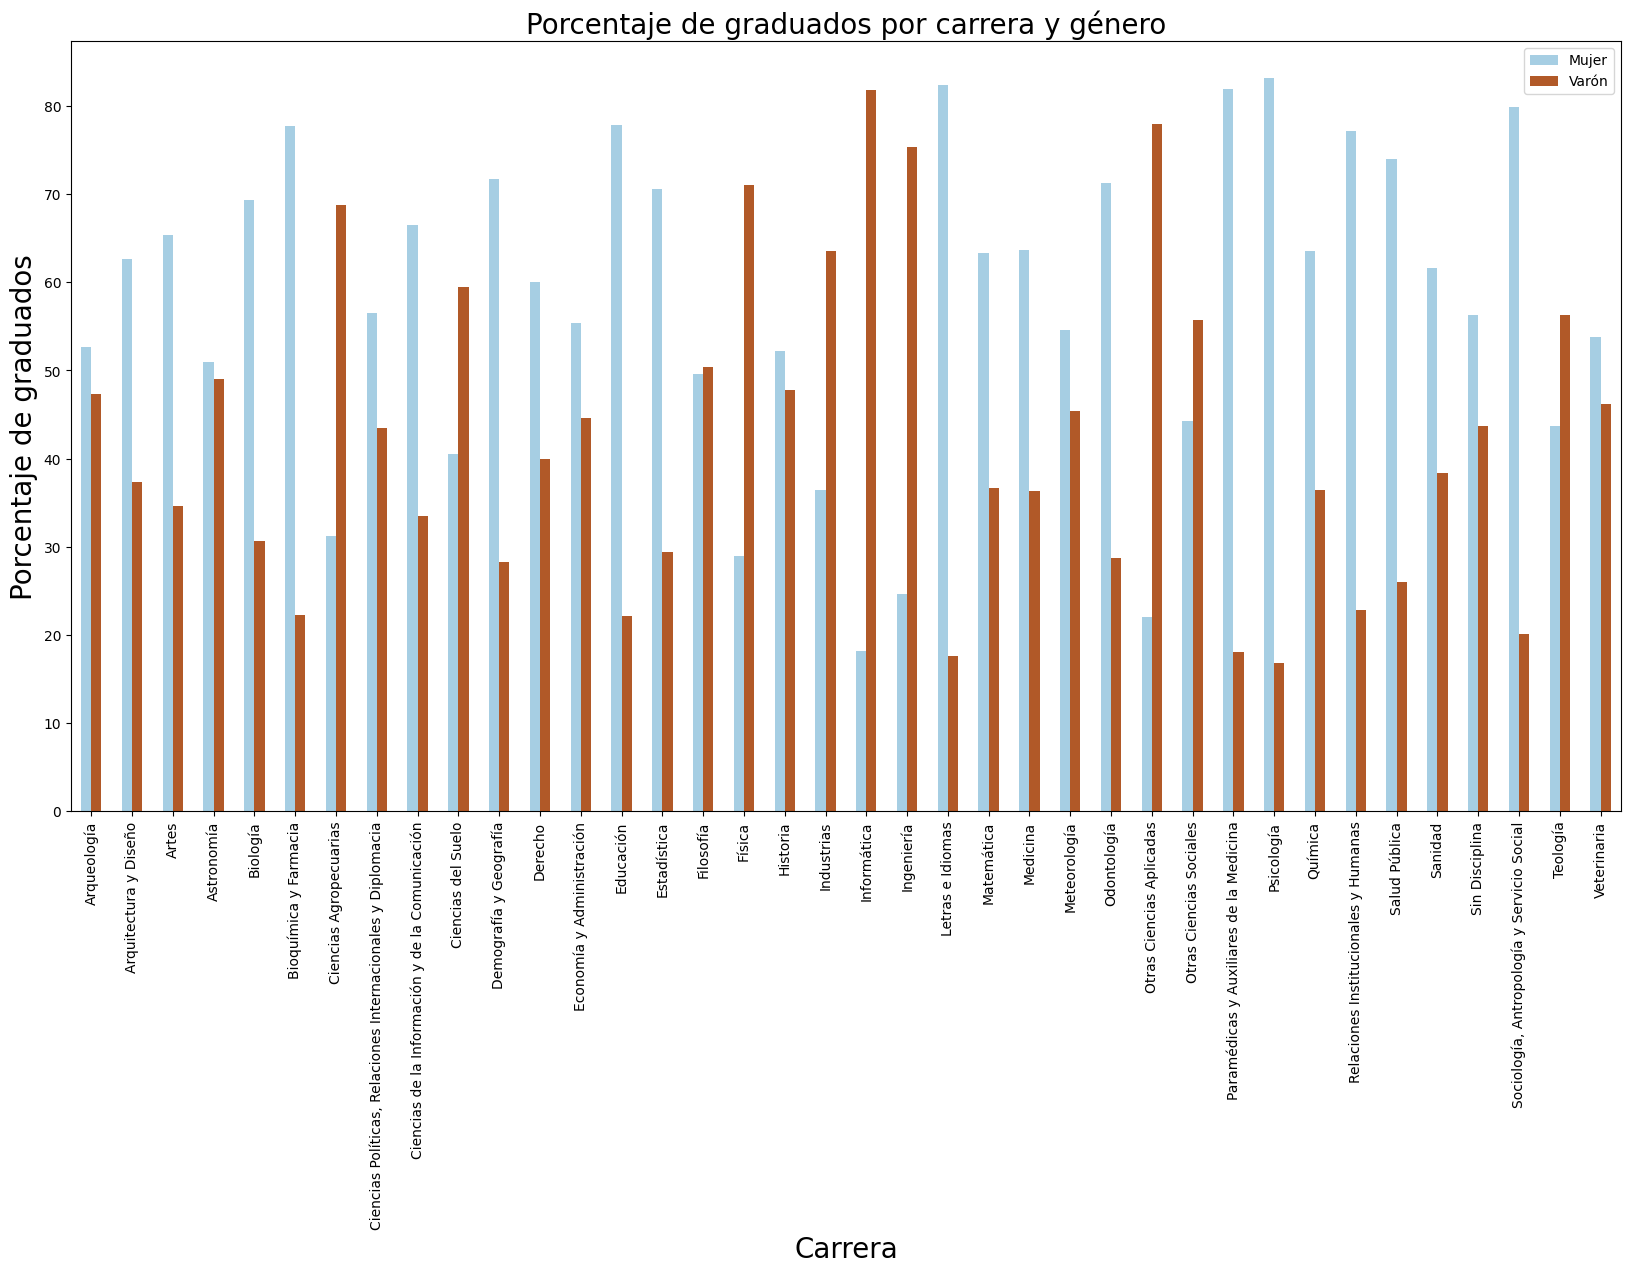

In [483]:
# Calculo de porcentajes de graduados por disciplinas agrupandolos por genero
titulo_genero = df_etiquetado.groupby(['disciplina_id', 'genero_id'])['id'].count()*100/df_etiquetado.groupby('disciplina_id')['id'].count()
titulo_genero.unstack().plot(kind='bar', stacked=False, figsize=(20, 10), fontsize=10, rot=90, colormap='Paired')
plt.xlabel('Carrera',fontsize=20)
plt.ylabel('Porcentaje de graduados', fontsize=20)
plt.title('Porcentaje de graduados por carrera y género',fontsize=20)
plt.legend(['Mujer', 'Varón'])
plt.show()

Las carreras en las cuales predomina el genero masculino con alrededor del 70% de estudiantes son:
- Informatica, Física, Ingeniría y 'Otras ciencias Aplicadas' ()
Mientras que el género femenino predomina con alrededor del 80% de estudiantes en las carreras de:
- Letras e Idiomas, Paramédicas y Auxiliares de la medicina y Psicología.
Las siguientes carreras tienen una distribución pareja en relacion al género de sus estudiantes:
- Filosofía, Astronomía e Historia

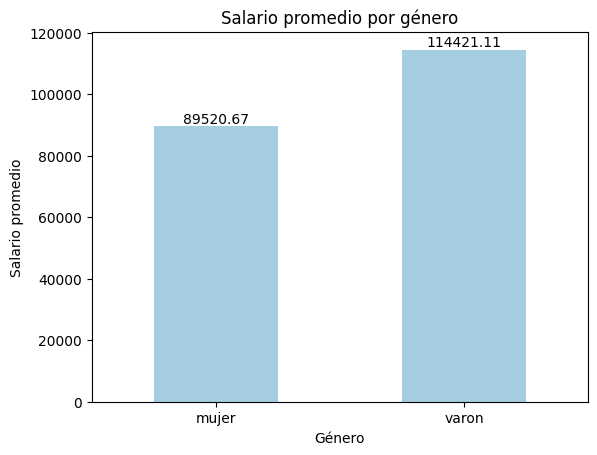

In [484]:
df_etiquetado.groupby('genero_id')['salario'].mean().plot(kind='bar', colormap='Paired', rot=0)

# Add labels to the bars with exact numbers
for i, bar in enumerate(plt.gca().patches):
  plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 str(round(bar.get_height(), 2)), ha='center', va='bottom')

plt.xlabel('Género')
plt.ylabel('Salario promedio')
plt.title('Salario promedio por género')
plt.show()


In [485]:
# Calcular la diferencia en porcentaje de la media del salario por genero
df_etiquetado.groupby('genero_id')['salario'].mean().pct_change()[1]

0.27815300404412424

Los salarios promedios para el género masculino es un 28% mas alto que la media de los salarios de las mujeres.

Ahora estudiamos las edades de las personas graduadas.

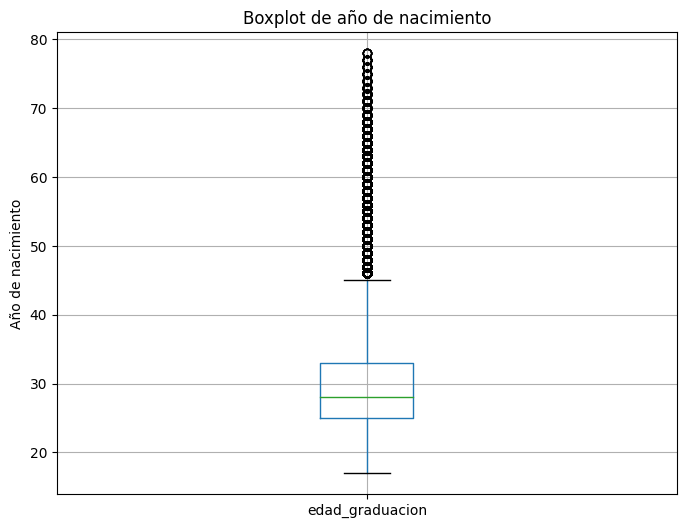

In [486]:
df_etiquetado.boxplot(column='edad_graduacion', grid=True, figsize=(8, 6))
plt.ylabel('Año de nacimiento')
plt.title('Boxplot de año de nacimiento')
plt.show()

Alrededor del 50% de los censados tienen alrededor de 28 años. La longitud de la caja nos indica que no estan muy dispersos los datos entre si. Las personas mayores de 45 forman parte de los outliers para los graduados en los años de 2016 y 2018

In [487]:
std_edad = df_etiquetado['edad_graduacion'].std()
print(f'El desvío estándar de la edad es {std_edad}')

El desvío estándar de la edad es 7.884686979375755


In [488]:
print(f"Edad del graduado mas joven: {df_etiquetado['edad_graduacion'].min()}")
print(f"Edad del graduado mas grande: {df_etiquetado['edad_graduacion'].max()}")

Edad del graduado mas joven: 17
Edad del graduado mas grande: 78


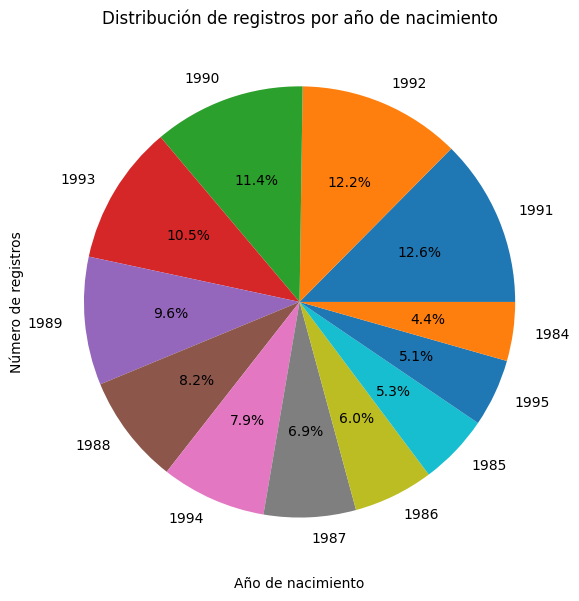

In [489]:
anio_counts = df_etiquetado['anionac'].value_counts()

# Descartamos aquel año de naciemiento que representan menos del 3% de los datos
filtered_anio_counts = anio_counts[anio_counts > (df_etiquetado.shape[0] * 0.03)]

plt.figure(figsize=(10, 7))
plt.pie(filtered_anio_counts, labels=filtered_anio_counts.index, autopct="%1.1f%%")
plt.title("Distribución de registros por año de nacimiento")
plt.xlabel("Año de nacimiento")
plt.ylabel("Número de registros")
plt.xticks(rotation=90)
plt.show()


El mayor porcentaje de graduados entre el 2016 y 2018 nacieron entre 1989 y 1991. Por lo que al momento de recibirse tienen alrededor de 27 años

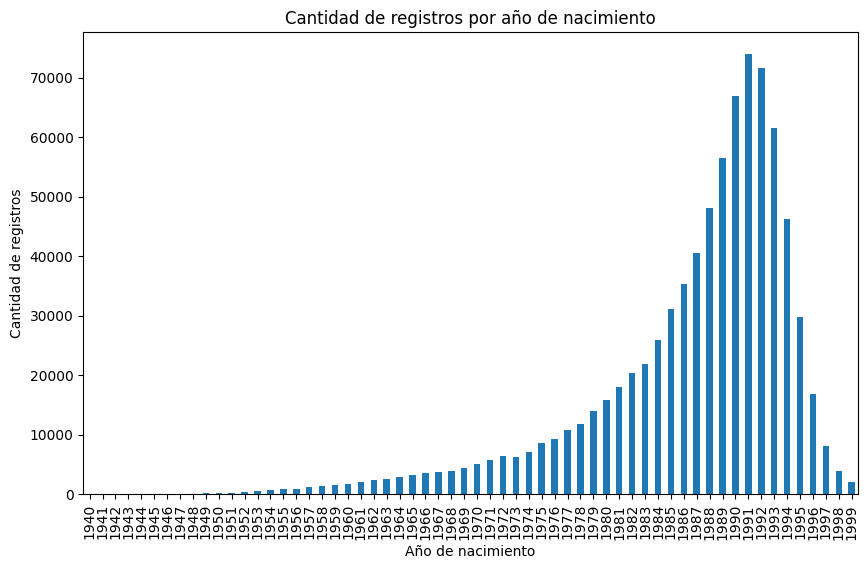

In [490]:
df_etiquetado['anionac'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Año de nacimiento')
plt.ylabel('Cantidad de registros')
plt.title('Cantidad de registros por año de nacimiento')
plt.show()


El pico de los graduados entre el 2016-2018 se dió para los nacidos en el 1991, es decir que al momento de graduarse tenían entre 25 y 27 años.

# Analisis georeferencial

Queremos conocer cómo se distribuye la media salarial en toda la región Argentina

In [508]:
# Calculamos la media por region
promedio_salarial = df_etiquetado.groupby('region_id')['salario'].mean().reset_index()

In [509]:
promedio_salarial['geometry'] = promedio_salarial['region_id'].map(regiones_poligonos)

In [510]:
df_etiquetado['geometry'] = df_etiquetado['geometry'].str.strip()

In [511]:
import shapely

In [512]:
# Usamos shapely para convertir los valores de los poligonos de la columna geometry en valores válidos para posteriormente crear un geodataframe
# wkt --> "Well-Known Text representation", es un string que representa un objeto geométrico
# loads --> parsea el wkt y crea el objeto shapely

promedio_salarial['geometry'] = promedio_salarial['geometry'].apply(shapely.wkt.loads)

In [513]:
# Convertimos el dataset de la informacion en un GeoDataFrame
gdf = gpd.GeoDataFrame(promedio_salarial, geometry='geometry')

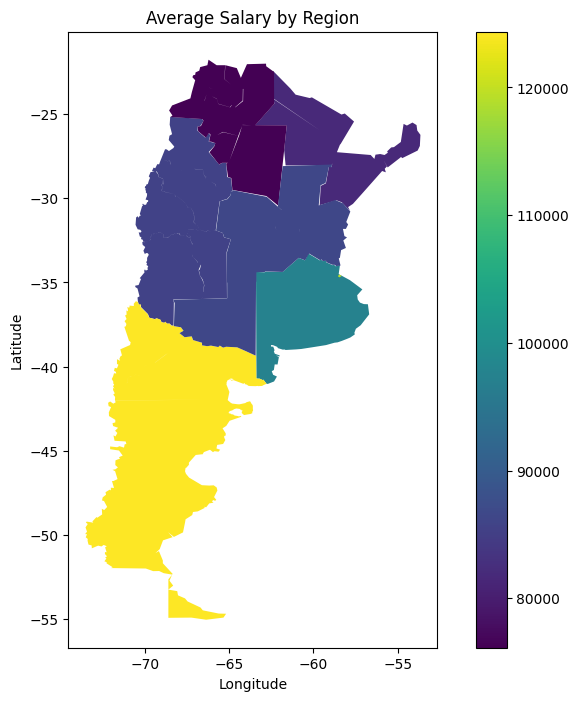

In [514]:
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(column='salario', cmap='viridis', ax=ax, legend=True)
plt.title('Average Salary by Region')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

El promedio mas alto de los salarios se encuentra en la región de la Patagonia, mientras que el promedio mas bajo esta en la región del noroeste, es decir las provincias de Misiones, Formosa, Corrientes y Chaco